In [0]:
import pandas as pd
from wordcloud import WordCloud

In [0]:
dataframe=pd.read_csv('/content/preprocessed.csv',encoding= 'unicode_escape')

In [6]:
dataframe.describe()

,Unnamed: 0
count,2084.000000
mean,1041.500000
std,601.743301
min,0.000000
25%,520.750000
50%,1041.500000
75%,1562.250000
max,2083.000000


In [7]:
dataframe

,Unnamed: 0,problems,keywords,urls,contents,target,Unnamed: 6,Unnamed: 7
0,0,Understand the virtual banking landscape of So...,"virtual banks, south korea, k bank, kakao bank...",https://krw.currencyrate.today/usd/18064,\nThe page provides the exchange rate of 18064...,valid,NaN,NaN
1,1,Understand the depth of Covid-19 crisis in a c...,"virus, epidemic, outbreak, company performance...",https://krw.currencyrate.today/usd/18064,Convert currency 18064 KRW to USD. How much is...,valid,NaN,NaN
2,2,What is webank china? I need to understand the...,"Webank, China, Technology, virtual bank, weban...",https://krw.currencyrate.today/usd/18064,\nSouth Korean Won\n\n18064 KRW\n=\n14.91 USD\...,valid,NaN,NaN
3,3,What is mybank china? I need to understand the...,"Mybank, China, Technology, virtual bank, Myban...",https://krw.currencyrate.today/usd/18064,\n ?18064.00 = $14.91,valid,NaN,NaN
4,4,NaN,NaN,https://krw.currencyrate.today/usd/18064,\n\n Inverse: 18064.00 USD = 21889955.2...,valid,NaN,NaN
...,...,...,...,...,...,...,...,...
2079,2079,What is mybank china? I need to understand the...,"Mybank, China, Technology, virtual bank, Myban...",https://www.kapronasia.com/asia-banking-resear...,"Two non-financial services entities, Korea Fed...",valid,NaN,NaN
2080,2080,What is mybank china? I need to understand the...,"Mybank, China, Technology, virtual bank, Myban...",https://www.kapronasia.com/asia-banking-resear...,"With its shareholding structure reshuffled, To...",valid,NaN,NaN
2081,2081,What is mybank china? I need to understand the...,"Mybank, China, Technology, virtual bank, Myban...",https://www.kapronasia.com/asia-banking-resear...,Analysts say that Toss Bank has a better chanc...,valid,NaN,NaN
2082,2082,What is mybank china? I need to understand the...,"Mybank, China, Technology, virtual bank, Myban...",https://www.kapronasia.com/asia-banking-resear...,"At the same time, Toss Bank doesn't have much ...",valid,NaN,NaN


In [0]:
keywords_list=dataframe["keywords"]
contents_list=dataframe["contents"]

In [48]:
keywords_list

0       virtual banks, south korea, k bank, kakao bank...
1       virus, epidemic, outbreak, company performance...
2       Webank, China, Technology, virtual bank, weban...
3       Mybank, China, Technology, virtual bank, Myban...
4                                                     NaN
                              ...                        
2079    Mybank, China, Technology, virtual bank, Myban...
2080    Mybank, China, Technology, virtual bank, Myban...
2081    Mybank, China, Technology, virtual bank, Myban...
2082    Mybank, China, Technology, virtual bank, Myban...
2083    Mybank, China, Technology, virtual bank, Myban...
Name: keywords, Length: 2084, dtype: object

In [49]:
contents_list

0       \nThe page provides the exchange rate of 18064...
1       Convert currency 18064 KRW to USD. How much is...
2       \nSouth Korean Won\n\n18064 KRW\n=\n14.91 USD\...
3                        \n        ?18064.00 = $14.91    
4       \n\n        Inverse: 18064.00 USD = 21889955.2...
                              ...                        
2079    Two non-financial services entities, Korea Fed...
2080    With its shareholding structure reshuffled, To...
2081    Analysts say that Toss Bank has a better chanc...
2082    At the same time, Toss Bank doesn't have much ...
2083    Sign up for our email newsletter and keep up t...
Name: contents, Length: 2084, dtype: object

In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [50]:
text=str(keywords_list)
text1=str(contents_list)
print(text)

0       virtual banks, south korea, k bank, kakao bank...
1       virus, epidemic, outbreak, company performance...
2       Webank, China, Technology, virtual bank, weban...
3       Mybank, China, Technology, virtual bank, Myban...
4                                                     NaN
                              ...                        
2079    Mybank, China, Technology, virtual bank, Myban...
2080    Mybank, China, Technology, virtual bank, Myban...
2081    Mybank, China, Technology, virtual bank, Myban...
2082    Mybank, China, Technology, virtual bank, Myban...
2083    Mybank, China, Technology, virtual bank, Myban...
Name: keywords, Length: 2084, dtype: object


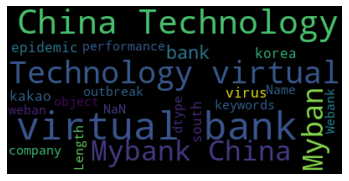

In [51]:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

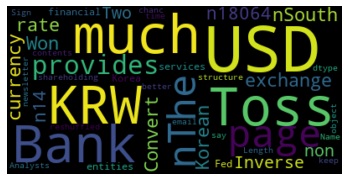

In [52]:
wordcloud = WordCloud().generate(text1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
#contents study

contents=dataframe['contents'][1]
context=contents
contents=str(contents)

In [0]:
def lexical_diversity(text):
    try:
        return len(set(text)) / len(text) 
    except:
        return 1

In [55]:
lexical_diversity(contents.split(' '))

0.85

In [0]:
import nltk 
fdist1 = nltk.FreqDist(contents.split(' '))

In [57]:
fdist1.most_common(50)

[('18064', 2),
 ('to', 2),
 ('US', 2),
 ('Convert', 1),
 ('currency', 1),
 ('KRW', 1),
 ('USD.', 1),
 ('How', 1),
 ('much', 1),
 ('is', 1),
 ('South', 1),
 ('Korean', 1),
 ('Won', 1),
 ('Dollar?', 1),
 ('\x97', 1),
 ('14.91', 1),
 ('Dollar.', 1)]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0, flags=flags)


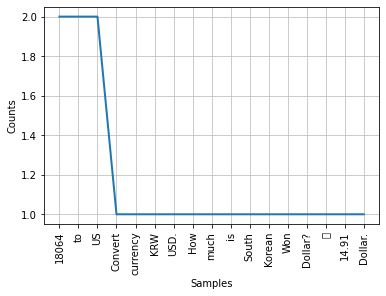

In [58]:
fdist1.plot()

In [59]:
keyword=dataframe["keywords"][1]
keyword_words_list=keyword.split(' ')
fdist2 = nltk.FreqDist(keyword_words_list)
fdist2.most_common(50)

[('company', 3),
 ('performance,', 2),
 ('virus,', 1),
 ('epidemic,', 1),
 ('outbreak,', 1),
 ('healthcare,', 1),
 ('aviation,', 1),
 ('hospitality,', 1),
 ('digital,', 1),
 ('stock', 1),
 ('price,', 1),
 ('IPO,', 1),
 ('', 1),
 ('action,', 1),
 ('decision,', 1),
 ('effect,', 1),
 ('affect,', 1),
 ('adversity', 1)]

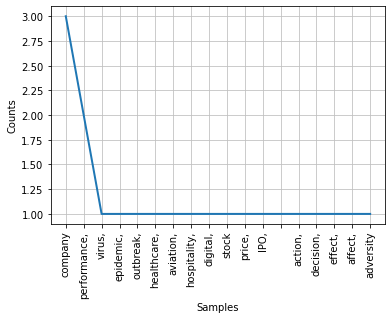

In [60]:
fdist2.plot()

In [0]:
c_diversity=lexical_diversity(contents.split(' '))
k_diversity=lexical_diversity(keyword_words_list)

In [62]:
print("content diversity",c_diversity)
print("keyword diversity",k_diversity)

content diversity 0.85
keyword diversity 0.8571428571428571


In [63]:
print(context)

Convert currency 18064 KRW to USD. How much is 18064 South Korean Won to US Dollar?  14.91 US Dollar.


In [64]:
print(keyword)

virus, epidemic, outbreak, company performance, healthcare, aviation, hospitality, digital, performance, stock price, IPO,  company action, company decision, effect, affect, adversity


In [65]:
#eculidean distance btw keywords and content
import numpy as np


dist=np.sqrt(np.sum((c_diversity - k_diversity) ** 2))

print("symentic distance ",dist)

symentic distance  0.0071428571428571175


In [76]:
import re
targets=dataframe['target']
dataset=[]
for i in range(len(targets)):
    
    contents=dataframe['contents'][i]
    keyword_set= dataframe['keywords'][i]
    keyword_lists = re.split(r'(-?\d*\.?\d+)',str(keyword_set))
    keywords=dataframe['keywords'][i]
    c_diversity=lexical_diversity(contents)
    for k in range(len(keyword_lists)):
        
        print(keyword_set)
        p_diversity=lexical_diversity(keyword_lists)
        dist=np.sqrt(np.sum((c_diversity - k_diversity) ** 2))
        if dist<0.45:
            data={
                'k':keyword_lists[k],
                'context':contents,
                'distance':dist,
                'target':'valid'

            }
            
        else:
            data={
                'k':keyword_lists[k],
                'context':contents,
                'distance':dist,
                'target':'invalid'

            }
            #dataset.append(data)
    dataset.append(data)

virtual banks, south korea, k bank, kakao bank, toss, funding in virtual banks, banking population, digital banking users, smartphone users,  digital loans, online deposits, digital only banks, virtual bank license, FSC south korea, virtual bank valuation
virus, epidemic, outbreak, company performance, healthcare, aviation, hospitality, digital, performance, stock price, IPO,  company action, company decision, effect, affect, adversity
Webank, China, Technology, virtual bank, webank financials, webank customers, revenue growth, webank founders
Mybank, China, Technology, virtual bank, Mybank financials, Mybank customers, revenue growth, Mybank founders
nan
virtual banks, south korea, k bank, kakao bank, toss, funding in virtual banks, banking population, digital banking users, smartphone users,  digital loans, online deposits, digital only banks, virtual bank license, FSC south korea, virtual bank valuation
virtual banks, south korea, k bank, kakao bank, toss, funding in virtual banks, 

In [77]:
dataset

[{'context': '\nThe page provides the exchange rate of 18064 South Korean Won (KRW) to US Dollar (USD), sale and conversion rate. Moreover, we added the list of the most popular conversions for visualization and the history table with exchange rate diagram for 18064 South Korean Won (KRW) to US Dollar (USD) from Saturday, 14/03/2020 till Saturday, 07/03/2020. Latest update of 18064 South Korean Won (KRW) exchange rate.Reversed rate: \nUS Dollar (USD) toSouth Korean Won (KRW)\n',
  'distance': 0.7536945812807881,
  'k': 'virtual banks, south korea, k bank, kakao bank, toss, funding in virtual banks, banking population, digital banking users, smartphone users,  digital loans, online deposits, digital only banks, virtual bank license, FSC south korea, virtual bank valuation',
  'target': 'invalid'},
 {'context': 'Convert currency 18064 KRW to USD. How much is 18064 South Korean Won to US Dollar? \x97 14.91 US Dollar.',
  'distance': 0.5238095238095237,
  'k': 'virus, epidemic, outbreak, c

In [0]:
df = pd.DataFrame(dataset)

In [0]:
df.to_csv('final_datset.csv')

In [80]:
dat=dataframe['keywords']

for i in range(len(dat)):
    print(dataframe['keywords'][i])

virtual banks, south korea, k bank, kakao bank, toss, funding in virtual banks, banking population, digital banking users, smartphone users,  digital loans, online deposits, digital only banks, virtual bank license, FSC south korea, virtual bank valuation
virus, epidemic, outbreak, company performance, healthcare, aviation, hospitality, digital, performance, stock price, IPO,  company action, company decision, effect, affect, adversity
Webank, China, Technology, virtual bank, webank financials, webank customers, revenue growth, webank founders
Mybank, China, Technology, virtual bank, Mybank financials, Mybank customers, revenue growth, Mybank founders
nan
virtual banks, south korea, k bank, kakao bank, toss, funding in virtual banks, banking population, digital banking users, smartphone users,  digital loans, online deposits, digital only banks, virtual bank license, FSC south korea, virtual bank valuation
virtual banks, south korea, k bank, kakao bank, toss, funding in virtual banks, 

In [0]:
final_data=pd.read_csv('final_datset.csv')

In [82]:
final_data

,Unnamed: 0,k,context,distance,target
0,0,"virtual banks, south korea, k bank, kakao bank...",\nThe page provides the exchange rate of 18064...,0.753695,invalid
1,1,"virus, epidemic, outbreak, company performance...",Convert currency 18064 KRW to USD. How much is...,0.523810,invalid
2,2,"Webank, China, Technology, virtual bank, weban...",\nSouth Korean Won\n\n18064 KRW\n=\n14.91 USD\...,0.376374,valid
3,3,"Mybank, China, Technology, virtual bank, Myban...",\n ?18064.00 = $14.91,0.470046,invalid
4,4,NaN,\n\n Inverse: 18064.00 USD = 21889955.2...,0.513057,invalid
...,...,...,...,...,...
2079,2079,"Mybank, China, Technology, virtual bank, Myban...","Two non-financial services entities, Korea Fed...",0.731474,invalid
2080,2080,"Mybank, China, Technology, virtual bank, Myban...","With its shareholding structure reshuffled, To...",0.780085,invalid
2081,2081,"Mybank, China, Technology, virtual bank, Myban...",Analysts say that Toss Bank has a better chanc...,0.746032,invalid
2082,2082,"Mybank, China, Technology, virtual bank, Myban...","At the same time, Toss Bank doesn't have much ...",0.748571,invalid
